In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import pearsonr 
from sklearn.neural_network import MLPClassifier
import statistics
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

import lightgbm as lgb

In [2]:
train = pd.read_csv("C:\\Users\\2017e082\\Desktop\\EC9560\\LAB_01_EC9560_2017E082\\train.csv")
test = pd.read_csv("C:\\Users\\2017e082\\Desktop\\EC9560\\LAB_01_EC9560_2017E082\\test.csv")

In [3]:
print("Train = " ,train.shape)
print("Test = " ,test.shape)

Train =  (88858, 10)
Test =  (59310, 9)


In [4]:
print("Train Information")
print(train.info())
print("\nTest Information")
print(test.info())

Train Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
ID                         88858 non-null object
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          79858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB
None

Test Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
ID                         59310 non-null object
Estimated_Insects_Count    59310 non-null int64
Crop_Type                  59310 non-null int64
Soil_Type                  59310 non-null int64
Pest

In [5]:
ID=pd.DataFrame(test["ID"])

In [6]:
del test["ID"]
del train["ID"]

In [7]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [8]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [9]:
for x in train:
    print(x)
    print(list(train[x].unique()))
    print()

Estimated_Insects_Count
[188, 209, 257, 342, 448, 577, 731, 1132, 1212, 1575, 1785, 2138, 2401, 2999, 3516, 3895, 4096, 150, 151, 168, 232, 231, 256, 283, 312, 311, 375, 411, 410, 488, 489, 531, 626, 625, 677, 732, 789, 790, 851, 850, 915, 916, 984, 1056, 1296, 1297, 1385, 1478, 1576, 1678, 1786, 1898, 2015, 2016, 2139, 2267, 2402, 2542, 2541, 2688, 2687, 2840, 3164, 3165, 3336, 3337, 3702, 3896, 169, 3515, 4097]

Crop_Type
[1, 0]

Soil_Type
[0, 1]

Pesticide_Use_Category
[1, 3, 2]

Number_Doses_Week
[0, 30, 40, 60, 20, 25, 45, 50, 15, 10, 5, 35, 70, 55, 80, 90, 85, 65, 75, 95]

Number_Weeks_Used
[0.0, nan, 26.0, 20.0, 15.0, 14.0, 19.0, 24.0, 8.0, 23.0, 25.0, 28.0, 29.0, 22.0, 21.0, 17.0, 30.0, 35.0, 32.0, 27.0, 16.0, 31.0, 33.0, 34.0, 39.0, 38.0, 42.0, 40.0, 41.0, 36.0, 44.0, 37.0, 46.0, 45.0, 47.0, 43.0, 50.0, 10.0, 49.0, 53.0, 48.0, 51.0, 54.0, 52.0, 55.0, 56.0, 61.0, 18.0, 57.0, 62.0, 60.0, 63.0, 66.0, 59.0, 64.0, 13.0, 7.0, 5.0, 12.0, 6.0, 9.0, 58.0, 11.0, 65.0, 67.0]

Number_Week

In [10]:
for x in test:
    print(x)
    print(list(test[x].unique()))
    print()

Estimated_Insects_Count
[188, 410, 626, 731, 789, 851, 1056, 1576, 1898, 2016, 2015, 2267, 2541, 2840, 2999, 3164, 3336, 150, 168, 209, 232, 231, 256, 311, 312, 342, 375, 411, 448, 488, 489, 531, 577, 625, 677, 732, 790, 850, 916, 915, 984, 1132, 1212, 1296, 1297, 1385, 1478, 1575, 1678, 1786, 1785, 2139, 2138, 2401, 2402, 2542, 2688, 2687, 3165, 3337, 3515, 3702, 3896, 3895, 4096, 151, 283, 3516, 4097, 257, 169]

Crop_Type
[1, 0]

Soil_Type
[1, 0]

Pesticide_Use_Category
[1, 3, 2]

Number_Doses_Week
[0, 30, 40, 20, 35, 65, 5, 15, 25, 10, 60, 80, 50, 45, 90, 70, 55, 75, 95, 85]

Number_Weeks_Used
[nan, 0.0, 20.0, 19.0, 10.0, 14.0, 22.0, 13.0, 26.0, 17.0, 15.0, 25.0, 18.0, 29.0, 23.0, 27.0, 34.0, 16.0, 35.0, 28.0, 21.0, 12.0, 31.0, 33.0, 24.0, 36.0, 38.0, 30.0, 32.0, 6.0, 41.0, 7.0, 37.0, 40.0, 39.0, 45.0, 47.0, 42.0, 43.0, 44.0, 50.0, 52.0, 48.0, 46.0, 49.0, 56.0, 57.0, 54.0, 51.0, 53.0, 58.0, 59.0, 64.0, 62.0, 5.0, 9.0, 55.0, 8.0, 11.0, 61.0, 60.0, 65.0, 67.0, 66.0, 63.0]

Number_Week

In [11]:
for x in train:
    print(x)
    print(len(train[x].unique()))
    print()

Estimated_Insects_Count
71

Crop_Type
2

Soil_Type
2

Pesticide_Use_Category
3

Number_Doses_Week
20

Number_Weeks_Used
65

Number_Weeks_Quit
51

Season
3

Crop_Damage
3



In [12]:
for x in test:
    print(x)
    print(len(test[x].unique()))
    print()

Estimated_Insects_Count
71

Crop_Type
2

Soil_Type
2

Pesticide_Use_Category
3

Number_Doses_Week
20

Number_Weeks_Used
65

Number_Weeks_Quit
51

Season
3



In [13]:
object_col = train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(adults[col].value_counts(dropna=False)/adults.shape[0],'\n')
    
for col in object_col:
    train.loc[train[col]=='?', col] = np.nan
    test.loc[test[col]=='?', col] = np.nan

col_missing_pct = train.isna().sum()/train.shape[0]
col_missing_pct.sort_values(ascending=False)

train = train.fillna(value=28, axis=0)
test = test.fillna(value=28, axis=0)

print("After removing the missing value:")
print("Training set has {} samples.".format(train.shape[0]))
print("Testing set has {} samples.".format(test.shape[0]))
print(format(train["Number_Weeks_Used"].unique()))
print(format(test["Number_Weeks_Used"].unique()))
train.head()
test.head()

After removing the missing value:
Training set has 88858 samples.
Testing set has 59310 samples.
[ 0. 28. 26. 20. 15. 14. 19. 24.  8. 23. 25. 29. 22. 21. 17. 30. 35. 32.
 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43. 50.
 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59. 64.
 13.  7.  5. 12.  6.  9. 58. 11. 65. 67.]
[28.  0. 20. 19. 10. 14. 22. 13. 26. 17. 15. 25. 18. 29. 23. 27. 34. 16.
 35. 21. 12. 31. 33. 24. 36. 38. 30. 32.  6. 41.  7. 37. 40. 39. 45. 47.
 42. 43. 44. 50. 52. 48. 46. 49. 56. 57. 54. 51. 53. 58. 59. 64. 62.  5.
  9. 55.  8. 11. 61. 60. 65. 67. 66. 63.]


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [14]:
for x in train:
    print(x)

Estimated_Insects_Count
Crop_Type
Soil_Type
Pesticide_Use_Category
Number_Doses_Week
Number_Weeks_Used
Number_Weeks_Quit
Season
Crop_Damage


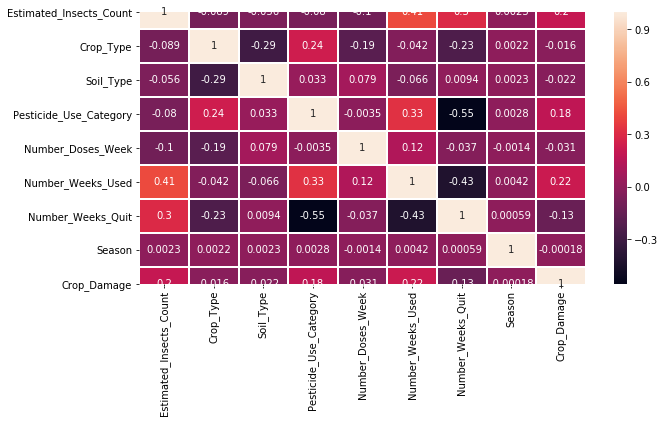

In [47]:
cor=train.corr()

fig, ax = plt.subplots(figsize=(10,5))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 10 , top - 10)
ax = sns.heatmap(cor, annot=True,linewidths=1)
plt.show()


In [ ]:
X_train=train.drop(labels="Crop_Damage", axis=1)
Y_train=train["Crop_Damage"]

In [ ]:
MLP =MLPClassifier(learning_rate_init= 0.001 , hidden_layer_sizes=(100) , solver='adam', max_iter=1000)
MLP.fit(X_train, Y_train)

In [ ]:
Y_test=pd.DataFrame(MLP.predict(test),columns =["Crop_Damage"])
Y_test

In [ ]:
Y_test.shape

In [ ]:
ID.shape

In [ ]:
df=pd.concat([ID, Y_test], axis=1)

In [ ]:
df

In [ ]:
df.to_csv("C:\\Users\\2017e082\\Desktop\\EC9560\\LAB_01_EC9560_2017E082\\result.csv",index=False)